<a href="https://colab.research.google.com/github/zeesh-ali/machinelearningcourse.io/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import random
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [6]:
#Load data
df=pd.read_csv('creditcard.csv',low_memory=False)
#Shuffle Data
df=df.sample(frac=1).reset_index(drop=True)

#First few records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,71018.0,1.230013,0.040710,-0.199612,-0.084825,-0.105509,-0.864397,0.303826,-0.168130,-0.302952,0.046842,1.168350,0.597604,-0.454339,0.741024,0.160758,0.344606,-0.513629,-0.336199,0.684030,-0.020747,-0.338740,-1.141082,0.075238,0.027240,0.196077,0.705028,-0.120508,-0.009261,38.00,0
1,130682.0,-0.584564,-0.388092,1.548089,-0.647859,-0.130118,0.477509,0.106883,-0.057143,-1.223869,0.762206,0.771906,0.315453,0.478812,-0.289174,0.051703,-1.495566,-0.255214,1.599967,0.397357,-0.217121,-0.517164,-0.913624,0.192981,0.657408,-0.792006,0.024214,-0.124174,-0.020654,96.00,0
2,131718.0,-0.761159,0.030820,2.048984,-1.766757,-0.057771,0.205751,0.210529,0.072038,-1.165418,0.356863,0.654240,0.175988,0.120141,-0.357042,-0.531706,-1.004480,-0.617459,1.496992,-0.555365,-0.116826,-0.652535,-1.304504,-0.042118,0.703746,0.079551,0.289277,0.069545,-0.098517,29.75,0
3,134931.0,-1.200503,1.315023,1.374669,0.935623,-0.156847,0.130243,0.788210,-0.042447,1.170890,0.892188,-1.395683,-0.488747,-1.537906,-0.526012,-0.640645,-1.035929,0.291370,-0.601309,1.119928,0.382521,-0.670705,-1.196527,0.075747,-0.155024,-0.156203,-0.912064,0.471960,0.194761,35.99,0
4,38868.0,0.102056,-0.524274,-0.067107,-2.550789,1.426914,3.438821,-1.007796,0.826191,-2.674680,1.346280,-0.345294,-1.383096,0.507887,-0.193001,1.040166,-0.570784,0.369603,0.699968,1.247021,-0.021862,-0.144953,-0.155071,-0.072164,0.989413,-0.330333,-0.131138,0.187806,0.148910,5.00,0


In [7]:
#EDA
print('Dimension of the dataset',df.shape)
print('Columns',df.columns,'\n')
print('NULL values\n',df.isnull().sum())
print('Statistical Summary\n',df.describe())
print('Corr Matrix\n',df.corr())
fr=df.loc[df['Class']==1]  #Fraudulent
nfr=df.loc[df['Class']==0] #Non Fradulent
print('No. of fradulent',len(fr))   #No. of fradulent
print('No. of Normal Non fraudulent',len(nfr))   #No. of Normal


Dimension of the dataset (284807, 31)
Columns Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object') 

NULL values
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Statistical Summary
                 Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  1.168949e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109    

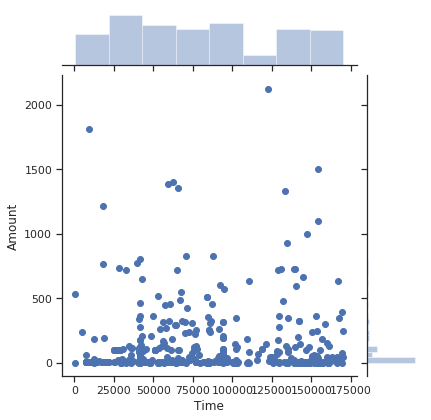

In [8]:
#Fraudulent Time with Amount
sns.jointplot(x="Time", y="Amount",data=fr);



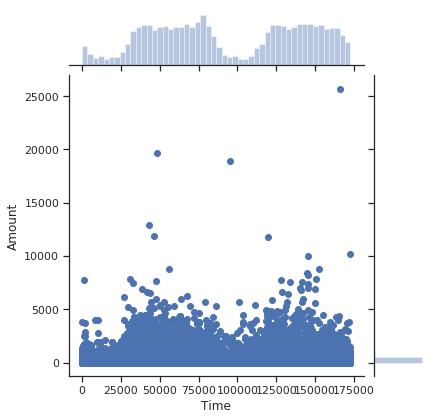

In [9]:
#Non Fraudulent Time with Amount
sns.jointplot(x="Time", y="Amount",data=nfr);


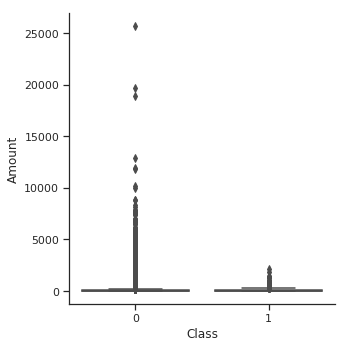

In [10]:
#Plotting Fraud & Normal Amount with class
sns.catplot(y="Amount", x="Class",kind="box", data=df);

In [0]:
#Import libraries for ML
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

In [12]:
x=df.iloc[:,:-1]   #All Col but last
y=df['Class']   #Last Col
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.35) #Train 65%, Test 35%
print(pd.DataFrame({'Train':[len(X_train),len(Y_train)],'Test':[len(X_test),len(Y_test)]},index=['X','Y']))

    Train   Test
X  185124  99683
Y  185124  99683


In [13]:
#Logistic Regression
logistic=linear_model.LogisticRegression(C=1e5)   #C is penalty parameter to avoid overfitting on training dataset, 1e5 is 10^5
logistic.fit(X_train,Y_train)
print('score: ',logistic.score(X_test,Y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score:  0.9989867881183351


In [15]:
#Ridge Regression
ridge=Ridge()
ridge.fit(X_train, Y_train)
print('score: ',ridge.score(X_test,Y_test))

score:  0.4966383331892162


In [26]:
#Elastic Net
ENreg = ElasticNet()
ENreg.fit(X_train, Y_train)
print('score: ',ENreg.score(X_test, Y_test))

score:  -5.463925327742203e-07


Conclusion: Logistic Regression is performing much better than Ridge Regression & Elastic Net
